<a href="https://colab.research.google.com/github/subod4/wiki_node/blob/main/wikinode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wikipedia-api


  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15383 sha256=2d5b1bc2f1f6fe36cfccdb2daffedbf6adf2294b9c39c43126cb6be2cc50752d
  Stored in directory: /root/.cache/pip/wheels/0b/0f/39/e8214ec038ccd5aeb8c82b957289f2f3ab2251febeae5c2860
Successfully built wikipedia-api


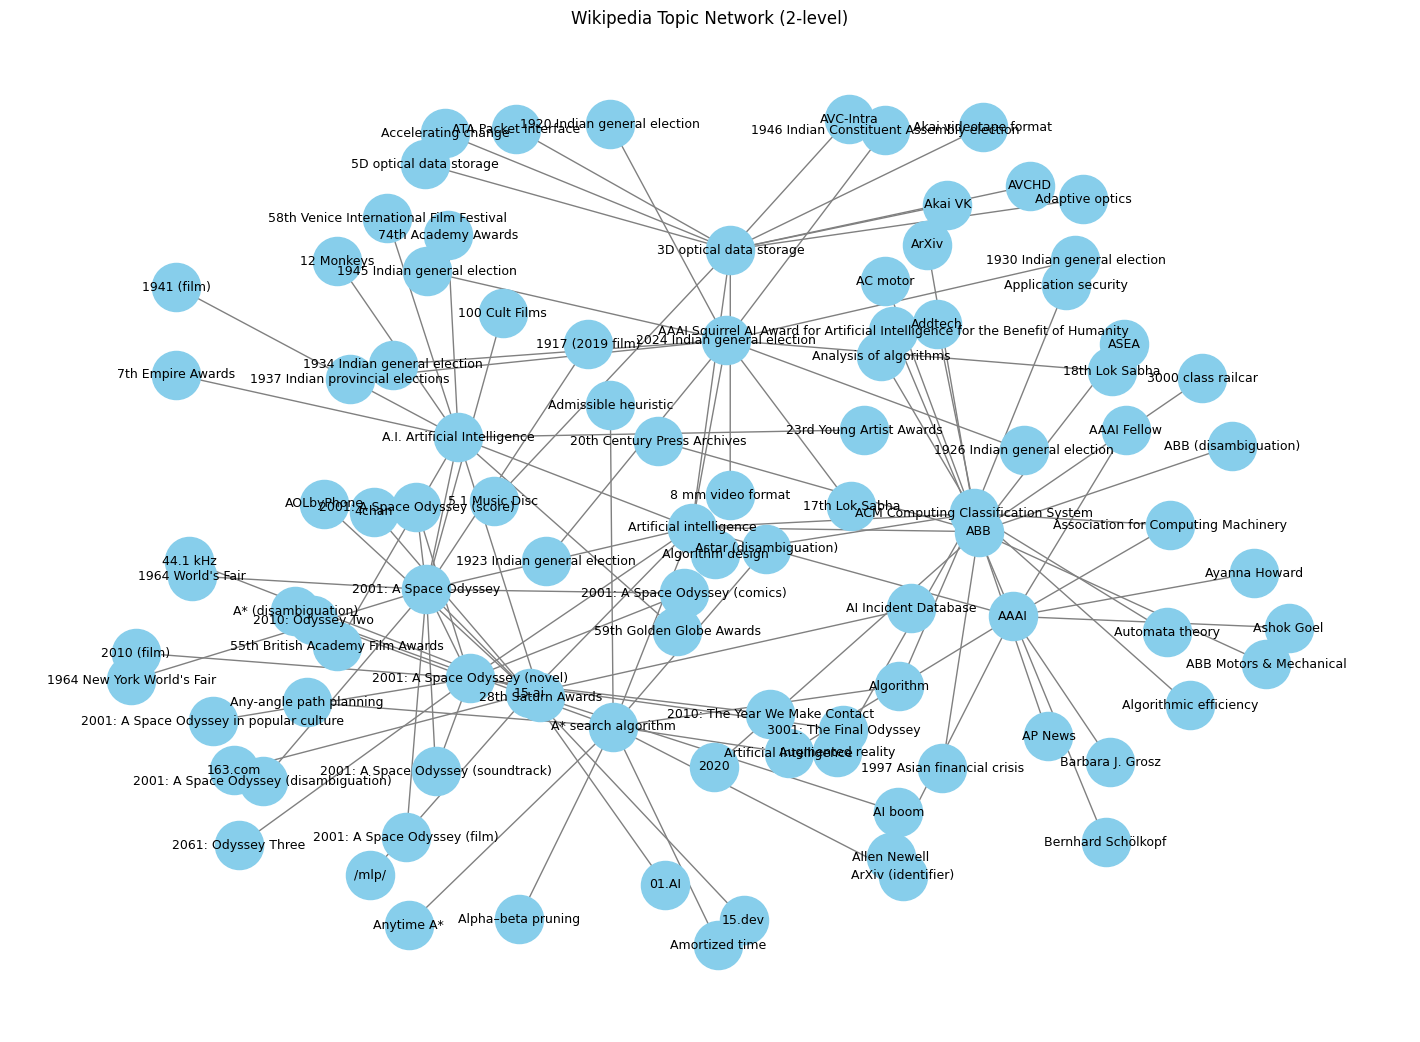

In [ ]:
import wikipediaapi
import networkx as nx
import matplotlib.pyplot as plt

# Setup Wikipedia API with proper User-Agent
wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent='SubodhBot/1.0 (https://example.com; contact@example.com)'
)

# Create an empty graph
G = nx.Graph()

# Set of visited nodes to avoid re-processing
visited = set()

# Get links from a Wikipedia page
def get_links(title, max_links=10):
    page = wiki.page(title)
    if not page.exists():
        return []
    links = list(page.links.keys())
    return links[:max_links]  # limit to avoid overload

# Recursively add nodes and links up to 2 levels
def add_article_and_links(title, depth=0, max_depth=1):
    if title in visited or depth > max_depth:
        return
    visited.add(title)

    links = get_links(title)

    for linked_title in links:
        G.add_node(linked_title)
        G.add_edge(title, linked_title)
        add_article_and_links(linked_title, depth + 1, max_depth)

# Start from a seed topic
seed = "Artificial intelligence"
G.add_node(seed)
add_article_and_links(seed, depth=0, max_depth=1)  # max_depth=1 means seed + its links

# 🔍 Visualize the graph
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1200, font_size=9)
plt.title("Wikipedia Topic Network (2-level)")
plt.show()
